<a href="https://colab.research.google.com/github/Maucho6340/1764-estadistica-con-python-probabilidad-y-muestreo/blob/main/optimizacion_aeroportuaria_propio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue'>**CLASE UNO** EXPLORANDO LOS DATOS

### **Presentación**

##### **Transcripción Presentación**<br>



Hola, damos la bienvenida a un nuevo entrenamiento en la plataforma Alura Latam. Nuestro nombre es Álvaro Hernando Camacho Diaz y seremos los instructores en este curso de IA aumentada, previsión de atrasos de vuelos.

Audiodescripción: Soy un hombre blanco, con cabello castaño. Visto una camiseta negra de Alura Latam y me encuentro en uno de los estudios de Alura con un fondo azul y morado.

En este entrenamiento, trataremos un conjunto de datos utilizando la biblioteca Pandas. También trabajaremos con NumPy. Adicionalmente, generaremos diversas visualizaciones con Matplotlib, Seaborn y Yellowbrick.

De la misma manera, estaremos modelando un modelo de Machine Learning (aprendizaje automático) con Scikit-learn, utilizando datos de retrasos de vuelos de un aeropuerto. A muchas personas les ha sucedido que se presentan imprevistos y retrasos en los vuelos. Esto genera costos tanto para las empresas como para los pasajeros.

La idea es, a través de este proyecto, poder generar un modelo que nos permita prever de forma muy precisa los retrasos en los vuelos, de modo que se pueda optimizar la operación aeroportuaria. De esta manera, todas las personas pasajeras y también las aerolíneas estarán satisfechas al ver una reducción tanto en tiempos de espera como en costos operativos.

### **Presentación, siguiente**

### **Entendiendo el conjunto de datos**

##### **Transcripción Entendiendo el conjunto de datos**<br>

### **Presentación, siguiente**

In [6]:
import pandas as pd

datos=pd.read_csv('/content/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [7]:
# Consultamos los metadatos o sea, los datos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [8]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [9]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Ya hicimos un análisis descriptivo y ahora vamos a hacer una análisis gráfico

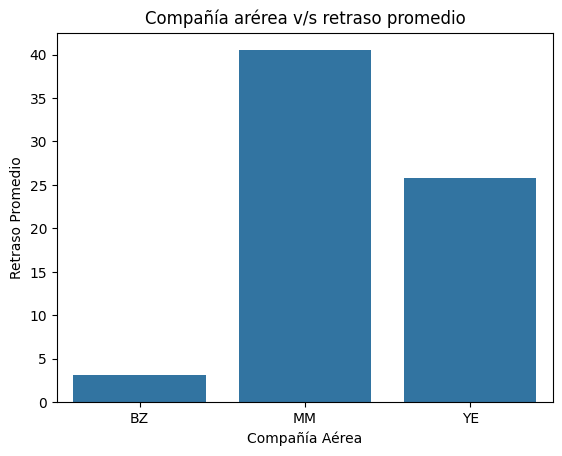

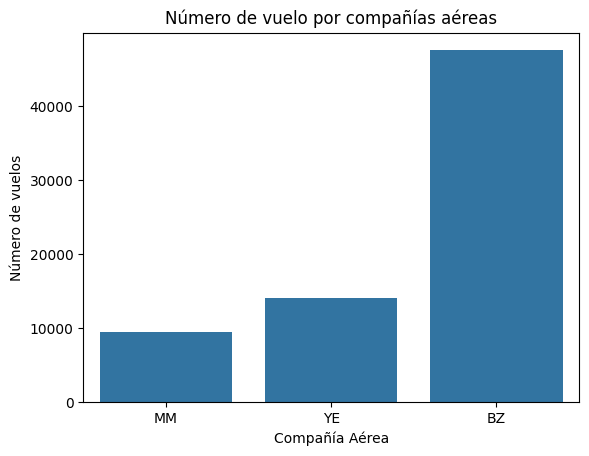

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañía arérea v/s retraso promedio')
plt.xlabel('Compañía Aérea')
plt.ylabel('Retraso Promedio')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelo por compañías aéreas')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de vuelos')
plt.show()

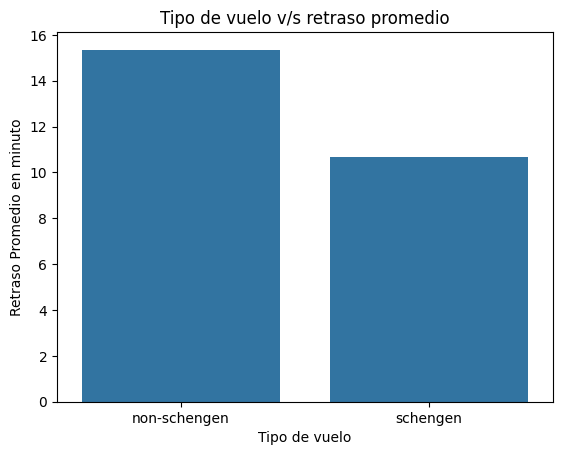

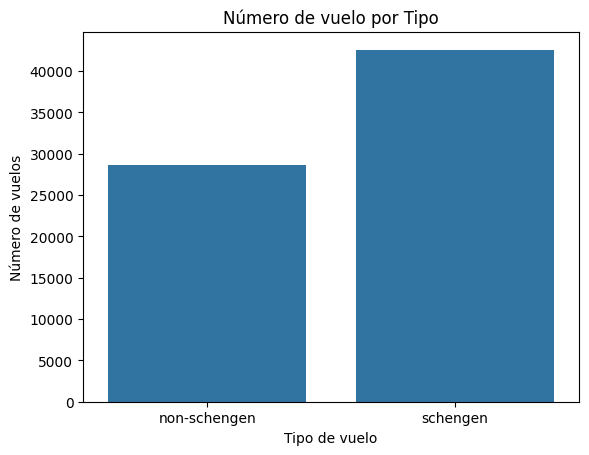

In [11]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo v/s retraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso Promedio en minuto')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelo por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

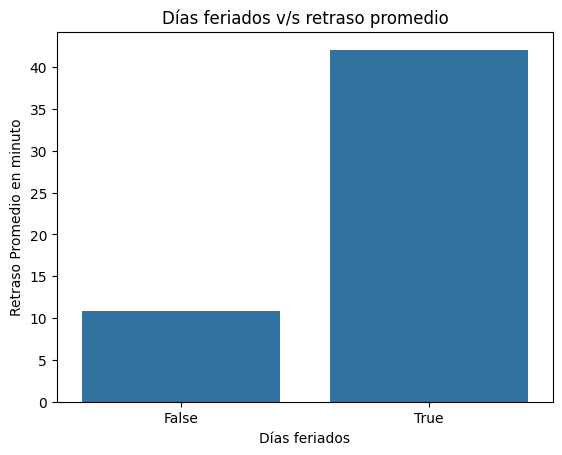

In [12]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados v/s retraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Retraso Promedio en minuto')
plt.show()

Para obtener el orden de los tipos de aeronaves

In [13]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [14]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


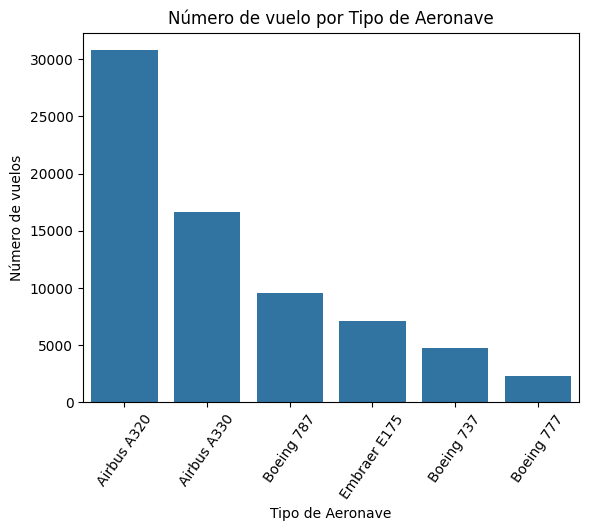

In [15]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelo por Tipo de Aeronave')
plt.xticks(rotation=55)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

##### <font color='blue'>**Para saber más**: el Espacio Schengen

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

![Visualización](https://cdn1.gnarususercontent.com.br/6/103811/a742b8af-0a53-458a-b192-b4cbecbfd843.png) <br>

Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

Para entender bien cómo están distribuidos los datos, vamos a utilizar el histograma, pero vamos a concentrarnos en datos relacionados con el atraso, o sea, horario de llegada, horario de salida y retrasos.<br>

Primero vamos a ver como está ditribuido nuestro horario de llegada

<Axes: xlabel='arrival_time', ylabel='Count'>

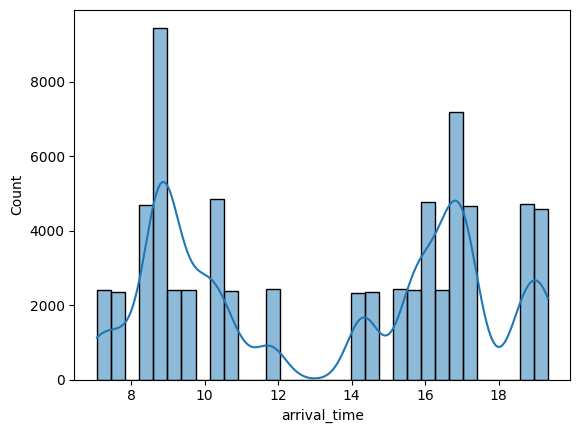

In [16]:
sns.histplot(data=datos,x='arrival_time',kde=True)

No parece ser que el ancho de los bin sea el adecuado y para ello nos basamos en la regla de Freedman y Diaconis<br>

![Visualización](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80f81da3e4a82713b8a80c981b151d5d7aea241)

Que establece, según la fórmula, que el Ancho de los Bins es igual a 2 veces el valor intercuantil dividido por la raíz cúbica de la cantidad de observaciones.<br>

Mayores consultas en: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule


In [17]:
# Para recrear la fórmula de Freedman Diaconis
import numpy as np
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

In [18]:
binwidth = ancho_bin(datos,'arrival_time')
binwidth

np.float64(0.3846176245547029)

<Axes: xlabel='arrival_time', ylabel='Count'>

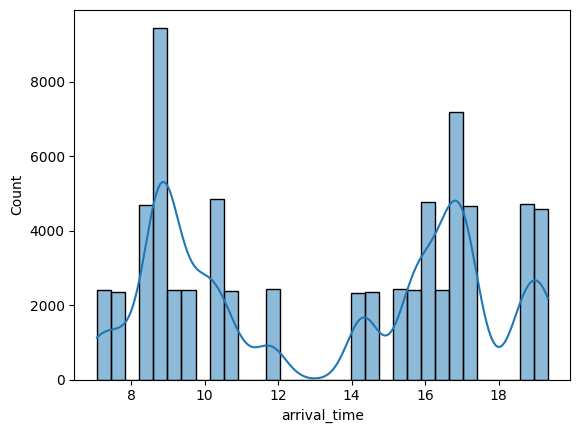

In [19]:
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

El apecto es bastante parecido, pero ahora si estamos convencidos que el ancho obedece a una regla matemática y no a una aprecición personal Podría incluso dar una valor al azar al binwidth.

<Axes: xlabel='arrival_time', ylabel='Count'>

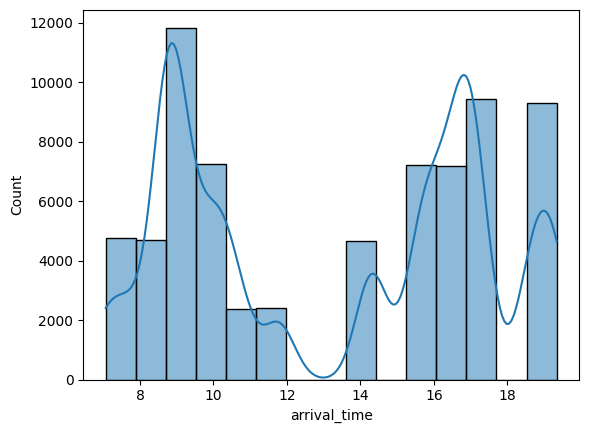

In [20]:
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=0.8)# tb puedo utilizar "bins=10" en vez de "binwidth"

En este caso el ancho no es el mas adecuado, pues la curva de densidad queda fuera de la cantidad de frecuencia:

Ahora vamos a visualizar el horario de llegada

<Axes: xlabel='departure_time', ylabel='Count'>

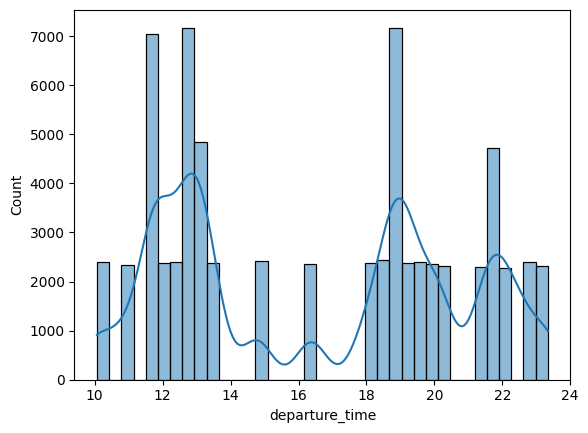

In [21]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

Observamos el horario de salida, la mayoría de las obervaciones están alrededor del mediodía y luego a las 13:00 hrs, y en la tarde el horario de llegada es alrededor de las 17:00 hrs y la salida alrededor de las 19:00 hrs.<br>
tenemos entonces una distribución bimodal. Pero lo que interesa es el gráfico de distribución de la variable respuesta que son los retrasos de los vuelos. Para ello avmos a generar una variable.

Ahora vamos a superponer el horario de salida con el de llegada

<Axes: xlabel='arrival_time', ylabel='Count'>

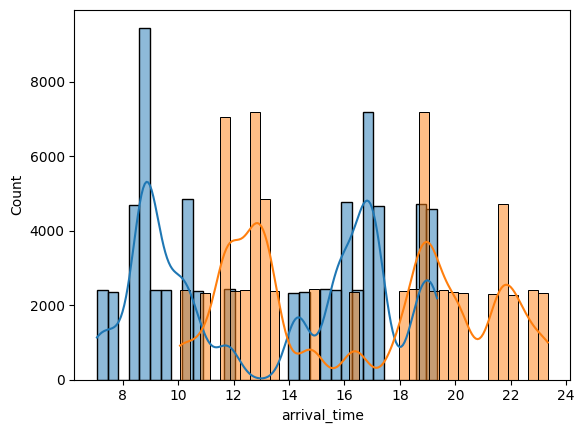

In [22]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

In [23]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()
print(f'El atraso promedio es: {atraso_promedio}')
print(f'El atraso mediano es: {atraso_mediana}')

El atraso promedio es: 12.548378015698628
El atraso mediano es: 9.740453855590491


Con estos datos vamos a generar dos gráficos, de caja e histograma.

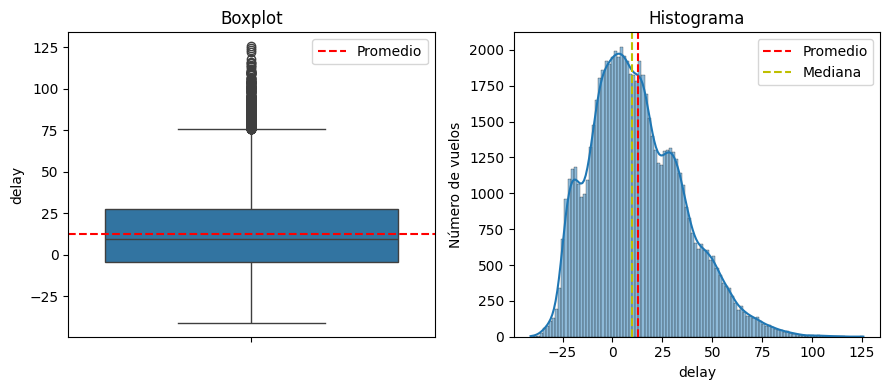

In [24]:
fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

Podemos notar que la mediana está alrededor de 10 mnts y la mediana 12 mnts, que coincide con los valores cuando hicimos el describe; tb el valor max es de 75 mnts de retraso y el resto son outliers. En el Histograma, la mediana y promedio están muy cercanos, y el gráfico tiene una forma muy cercana a la distribución normal.

##### <font color='blue'>**Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

![Visualiación](https://cdn1.gnarususercontent.com.br/6/103811/b07ec596-6a09-4c20-a6ee-648223e5857f.png)

Donde:

- El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
- El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
- La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
- El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
- El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.

## <font color='blue'>**CLASE DOS** FEATURE ENGINEERING

##### **Transcripción**

Transcripción
Te damos la bienvenida a nuestra Clase 2. Ya realizamos un análisis exploratorio de nuestros datos utilizando varios métodos de pandas para observar la estadística descriptiva de los mismos.

Generamos gráficos con Matplotlib y Seaborn, como histogramas, countplot y boxplot. De esta manera, ya tenemos una visión global de nuestro conjunto de datos.

Sabemos que está distribuido, por lo que no nos preocuparemos tanto por nuestra variable de respuesta, ya que se encuentra distribuida de manera que podemos utilizarla directamente en un modelo de machine learning.

Ahora procederemos a generar nuevas features o nuevos atributos, lo que se conoce como feature engineering (ingeniería de atributos). Para ello, tomaremos nuestras columnas.

Recordemos lo que tenemos en nuestras columnas con el atributo columns de nuestro DataFrame. Observamos que tenemos la columna Day (día) y la columna Year, pero no tenemos una columna que tenga que ver con la fecha. Entonces, podríamos crear la columna Fecha a partir de estas dos columnas.

Si revisamos la parte superior, cuando estábamos haciendo el análisis de los metadatos, notamos que tanto Day como Year son enteros. Podemos aprovechar esta situación para hacer algunos ajustes.

Adicionalmente, observamos en la estadística descriptiva que el valor mínimo de día es cero, equivalente al primero de enero, y el máximo es 364, que sería el último día del año. En cuanto a los años, tenemos valores desde 2010 hasta 2022.

Lo que haremos es crear en nuestro DataFrame una columna que llamaremos date. Tomaremos el año y lo convertiremos en string con astype(str), y lo concatenaremos con un guion y también con el día.

Sin embargo, como comienza en el día cero, no podemos tratar este valor así; debemos comenzar a partir del día uno para poder utilizar un método de la biblioteca datetime que nos permita generar una fecha a partir de este formato.

Vamos a visualizar cómo se ve nuestro DataFrame con datos.head, mostrando solo dos filas. Notamos que ya tenemos la columna date. Deberíamos eliminar la columna datos, por lo que usaremos datos.drop. Aquí colocaremos columns y dentro de columns la columna datos. Con esto, ya hemos generado la nueva estructura de datos.

Ya tenemos la columna date directamente. Esto lo dejamos así; ni siquiera debíamos haberlo hecho de esta manera, pero fue necesario debido a un error con el nombre de la columna.

Ahora que la columna date está corregida, tenemos el año 2010 y el día 1, que corresponde al primer día del año. Ahora podemos tomar esta columna datos.date y utilizar el método de pandas to_datetime.

Colocamos datos, date y el formato, que será el siguiente: entre comillas %Y-%j. Este formato %Y-%j básicamente convierte el día 1 en el primero de enero y, por defecto, el día 365 en el 31 de diciembre.

Vamos a tomar los dos últimos valores de nuestro conjunto de datos con datos.tail para verificar que el último día del año es el 31 de diciembre de 2022.

Ahora que tenemos nuestra columna date, avancemos un poco más y generemos una columna que nos permita determinar si es fin de semana o no. Es muy interesante; tomaremos nuestro DataFrame y crearemos una columna que llamaremos isWeekend. Ya tenemos isHoliday, ahora añadiremos isWeekend.

La columna isWeekend será igual a datos. De datos, tomaremos la columna date y, utilizando el método de datetime, aplicaremos weekday y isin. Esto verificará si el día de la semana está dentro del sexto y séptimo día.

Los días comienzan a partir de cero, por lo que el día cinco representa sábado y el seis representa domingo; el lunes sería el cero. Así, sabemos que estamos aislando sábado y domingo para identificar si es fin de semana.

Además, crearemos una variable llamada dayName en datos. Con el mismo método de datetime, utilizaremos day_name, que nos devuelve el nombre del día de la semana. Vamos a realizar un datos.head o datos.sample para tomar una muestra de cinco registros de nuestro conjunto de datos.

Observamos que ya tenemos isWeekend, que quedará como booleano. Si es fin de semana, será verdadero para el día que fue sábado; perfecto, los otros días no son fin de semana. Los días son viernes (Friday), martes (Tuesday), miércoles (Wednesday), y la fecha está tal como la especificamos.

Hemos añadido nuevos atributos a partir únicamente del día y el año. Sin embargo, aún tenemos muchas variables categóricas, y para poder modelar con machine learning, es necesario que las codifiquemos. Esto lo veremos en el próximo video.

### **Feature engineering, siguiente**

La variable respuesta ya podemos utilizarla en un modelo machine learning.<br>
Ahora vamos a utilizar nuevas features o nuevos atributos, mas conocidos como Features Engineering, para ello, revisando nuestras columnas advertimos que tenemos una columna day y una año, pero no tenemos una columna fecha, por lo que podríamos crear la columna fecha a partir de esta dos columnas. Tanto day como year son enteros (Int64

In [25]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [26]:
#datos = datos.drop(columns=['datos'])
datos['date'] = datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-1
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-1
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-1


Ya tenemos la columna date que entrega el año y el día del año que en este caso es 1, o sea el primer día del año, por lo que podemos tomar esta columna date y aprovechar el método pandas to_datetime.

In [27]:
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.head(2)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [28]:
datos.sample(10)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
27935,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,37,2015,False,-8.911893,2015-02-07
10297,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,321,2011,False,52.995248,2011-11-18
56006,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,83,2020,False,27.520808,2020-03-24
69554,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,256,2022,False,31.222419,2022-09-14
64335,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,274,2021,False,-2.606819,2021-10-02
2830,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,188,2010,False,18.014047,2010-07-08
64754,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,301,2021,False,34.680856,2021-10-29
1920,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,128,2010,False,0.633995,2010-05-09
24077,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,145,2014,False,15.264565,2014-05-26
46953,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,210,2018,True,53.407352,2018-07-30


También podemos crear una columna que indique si es fin de semana y que día de la semana es.

In [29]:
# Lunes=0, martes=1,...,sábado=5, domingo=6.
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name']=datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
42602,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,285,2017,False,2.719587,2017-10-13,False,Friday
36410,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,237,2016,False,87.965449,2016-08-25,False,Thursday
44716,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,61,2018,False,23.656171,2018-03-03,True,Saturday
7915,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,162,2011,False,-5.221714,2011-06-12,True,Sunday
13438,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,165,2012,False,-23.052138,2012-06-14,False,Thursday


Ya tenemos nuevos atributos a partir del día y la fecha, sin embargo todavía tenemos muchas variables categóricas, y para poder modelar con machine learning, es necesario que tomemos estas variables y las codifiquemos.

##### <font color='blue'>**Para saber más**: ¿Qué es el feature engineering?

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**<br>
Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering**:<br>
1. Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.
1. Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo. <br>

**Técnicas de Feature Engineering**:<br>

Existen varias técnicas de feature engineering, incluyendo:

1. Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

1. Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

1. Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

## <font color='blue'>**Feature Encoding**

Machine lerning trabaja mejor cuendo nuestros datos están  codificados, es decir, variables numéricas y tenemos varios casos en nuestras variables que no lo son, como cadenas de caracteres o booleano. Por ello, vamos a tomar nuevamente la información de nuestra metadatos, para saber qué tipo de columnas tenemos.

In [30]:
# Para ignorar las advertencias que instala Python al entregar resultados
import warnings
warnings.filterwarnings('ignore')

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

Entonces tenemos que  la columnas: airline, aircraft_type, schengen y origin, son de tipo cadena de caracteres y hay que codificarlas. También tenemos variables tipo bool como is_weekend, is_holiday. Tambien la variable schengen que además de ser cadena de caracteres (str), también es boolena, pues solo tiene dos valores: schengen o no_schengen. Entonces haremos las modificaciones.

Primero las booleanas

In [32]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
66629,16,MM,Airbus A320,0,CSF,17.041281,20.041281,61,2022,0,64.392300,2022-03-03,0,Thursday
52725,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,230,2019,0,3.093110,2019-08-19,0,Monday
69570,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,258,2022,0,-6.706482,2022-09-16,0,Friday


Ahora vamos con las variables object (str)

In [33]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
datos_codificados =pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
36447,18,1,14.258911,20.258911,239,2016,0,-9.782905,2016-08-27,1,...,0,1,0,0,0,1,0,0,0,0
60826,16,0,17.041281,20.041281,40,2021,0,40.039112,2021-02-10,0,...,0,0,0,0,0,0,0,0,0,1
68139,23,1,18.801235,21.801235,162,2022,0,0.109060,2022-06-12,1,...,1,0,0,0,0,0,1,0,0,0
6306,25,0,19.341235,23.341235,55,2011,0,36.823764,2011-02-25,0,...,0,0,0,1,0,0,0,0,0,0
3862,29,1,8.591208,11.591208,257,2010,0,4.612827,2010-09-15,0,...,0,0,1,0,0,0,0,0,0,1


Ya tenemos nuestra variables categorizadas y casi listas para introducirlas en nuestro modelo de machine learning. Pero es necesario analizar un poco mejor las variables que estamos utilizando, por que hay casos en los cuales las variables se comportan de manera muy semejante y puden acabar perjudicando el modelo. Por ejemplo los horarios de llegada como los de salida, tenían un comportamiento muy semejante, ambos tenían una distribución bimodal por lo que se parecen mucho, pero la pregunta es, cómo podemos validar lo que estamos diciendo. Para ello utilizaremos un metodo de pandas que son las "correlaciones". Un mapa de correlaciones, nos indicará como se relaciona una variable respecto de otra; y la correlación puede ser "+" ó "-", varía de -1 a +1.<br>
- Correlación de 0 a -1: La variación es inversamente proporcional, p.ej.: mientras mas se demora en salir un vuelo, menos satisfacción tienen los clientes
- Correlación de 0 a +1: La variación es directamente proporcional, p.ej.: Mientras menos se demora la aerolínea en preparar una aeronave, menor va a ser la demora.

In [35]:
# Correlación entre los tiempos de llegada y los ptiempos de salida
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Existe una relación muy fuerte, casi de un 100%, por lo que estas variables en conjunto pueden acabar sezgando mi modelo y debo escoger sólo una.

In [36]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

Al revisar nuevamente los metadatos, ya cree variables a partir de variables str y bool. Y como ya tengo las variables codificadas, las originales las puedo remover. date, year, flight_id (ésta última no me da ningún patrón de identificación)

In [37]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
68901,1,9.668655,0,10.249970,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
53950,1,16.245220,0,30.932420,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3294,0,10.733469,0,-25.583608,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
60213,0,8.939996,1,124.401882,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
49695,1,7.708301,0,11.719280,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
47886,1,7.708301,0,4.223867,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
34703,1,8.923441,0,-4.968406,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50614,1,16.909690,0,7.243825,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
38084,0,10.177197,0,-0.797886,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
69593,1,16.245220,0,49.441976,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0


##### <font color='blue'> **Manos a la obra**: ¿Cómo utilizar el OneHotEncoder de Sklearn?

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

In [38]:
#categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
#df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
#df_encoded.head()

¡Ahora es el momento de poner en práctica otro enfoque!

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [39]:
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder

#categoricas = ['airline','aircraft_type','origin','day_name']

#one_hot_enc = make_column_transformer(
#    (OneHotEncoder(handle_unknown='ignore'),
#    categoricas),
#    remainder='passthrough')

#datos = one_hot_enc.fit_transform(datos)
#datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
#datos

Analizando el código anterior paso a paso:

1. **from sklearn.compose import make_column_transformer**: Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2. **from sklearn.preprocessing import OneHotEncoder**: Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3. **categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']**: Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4. **one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')**: Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5. **datos = one_hot_enc.fit_transform(datos)**: Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6. **datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())**: Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame.<br>
 También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

## <font color='blue'>**CLASE TRES** SELECCIÓN Y VALIDACIÓN DEL MODELO

## Definiendo una baseline.<br>

Esta referencia será el punto de partida y estaremos comparando todo el modelado ocn este punto de partida, con el propósito de mejorar la baseline. Nos apoyaremos en la biblioteca scikit-learn, que es muy útil para trabajar con machine lerning. Contienen todos los modelos de regresión, clasificación clusterinng, selección de modelos.<br>

https://scikit-lear.org/stable/




##### **Transcripción Base line**



Te damos la bienvenida a nuestra Clase 3. Vamos a iniciar con nuestro DataFrame completamente tratado para el modelado con Machine Learning (aprendizaje automático). Para ello, debemos establecer en primer lugar una línea base o referencia, conocida como Baseline. Esta Baseline será nuestro punto de partida y compararemos todo nuestro modelado con ella, ya que la idea es mejorarla.

Nos apoyaremos en gran medida en la biblioteca Scikit-Learn. Esta biblioteca es muy útil para trabajar con Machine Learning. Estamos trabajando con regresión, y existen diversos tipos de modelos de regresión que podemos utilizar, así como clasificación, clustering (agrupamiento) y selección de modelos.

La documentación de Scikit-Learn es muy completa, y recomendamos consultarla. Dejaremos el enlace disponible en nuestro cuaderno para que lo tengas a mano y sepas dónde consultar los documentos de todos los ejercicios que realizaremos.

Como mencionamos, vamos a crear una Baseline. Para esta Baseline, no es necesario que sea el mejor modelo; podemos crear un modelo dummy (básico), que no generaliza muy bien.

Para ello, utilizaremos DummyRegressor de sklearn.dummy. Este regresor realiza la regresión de manera básica. También utilizaremos train_test_split de sklearn.model_selection, que nos permitirá separar nuestro DataFrame en datos de prueba y datos de entrenamiento.

En la misma celda, definiremos X como nuestras variables independientes, tomando de nuestro DataFrame todas las variables excepto la columna delay, ya que delay es nuestra variable de respuesta. Así, X contendrá todas las columnas excepto delay, y Y será precisamente nuestra variable delay.

Procederemos a segregar nuestro modelo con X_train, X_test, Y_train y Y_test, en ese orden, utilizando train_test_split. Estableceremos un tamaño de muestra de prueba (test_size) de 0.3, lo que significa que probaremos con el 30% de nuestro DataFrame.

Para poder reproducir nuestro modelado, debemos establecer un estado de aleatoriedad, ya que todos estos modelos son pseudoaleatorios. Utilizaremos random_state=42, pero puedes elegir el número que desees para generar este estado de pseudoaleatoriedad.

Crearemos nuestro modelo de Baseline, al que llamaremos baseline, utilizando DummyRegressor. Ajustaremos nuestros datos a este modelo con baseline.fit, utilizando X_train y Y_train. Una vez entrenado nuestro modelo, procederemos a evaluarlo utilizando métricas.

Importaremos de sklearn.metrics las métricas mean_squared_error, mean_absolute_error y r2_score. Estas métricas nos permitirán medir el error de nuestro modelo. El coeficiente de determinación (r2_score) es especialmente importante, ya que indica qué tanto las variables independientes logran explicar la variable de respuesta.

Vamos a crear nuestra variable yPredDummy. Aquí simplemente tomamos baseline.predict y colocamos X_test. Hacemos esa predicción y definimos una función que llamaremos calcularRegresión, la cual recibirá los valores reales y los valores predichos.

Dentro de nuestra función, colocaremos el rootMeanSquaredError, utilizando Y_test y la y predicha por nuestro modelo. No queremos que lo ponga al cuadrado, sino que deje el valor sin elevar al cuadrado para que siempre quede como un número positivo.

También tenemos el error absoluto promedio, mAe, que sería mean_absolute_error con los mismos parámetros: Y_test y y predicha. Además, queremos el R2, que sería r2_score con Y_test y y predicha.

Vamos a crear un diccionario llamado métricas y colocaremos primero RmSe con su valor, luego mAe con su valor, y finalmente R2 con su valor. Estos números se devolverán con varias cifras decimales, así que les daremos un tratamiento especial, limitándolos a 4 cifras decimales.

Devolvemos nuestras métricas. Ya creamos nuestra función, ahora generamos una variable llamada resultadosBaseLine, que será calcularRegresión con Y_test y el valor de nuestro DummyRegressor. Visualizamos resultadosBaseLine.

Observamos un error: "Squared got unexpected argument squared". Revisamos la documentación y vemos que la opción squared ya no está disponible. Reinstanciamos nuestra función y corregimos elevando a un medio directamente.

Esto es porque necesitamos que no muestre los minutos al cuadrado. Refinamos esto colocando la multiplicación internamente para sacar la raíz cuadrada en este punto.

Ejecutamos nuevamente. El error cuadrado medio es de 23.16 minutos, el error absoluto medio es de 18.5 minutos, y el coeficiente de determinación es de cero. Este modelo no está generalizando de manera correcta.

Esta es nuestra línea base (baseline), y en el próximo video adoptaremos un modelo más adecuado para mejorar estos resultados. Nos vemos en la próxima.

### **Selección y validación del modelo, siguiente**

In [40]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Del DF vamos a tomar todas las columna, excepto delay que es nuestra variable de respuesta
X = df.drop(['delay'],axis=1)
y = df['delay']

# Segregamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Creamos el modelo
baseline = DummyRegressor()
#Ajustamos los datos del modelo
baseline.fit(X_train,y_train)# Con esto entrenamos el modelo

DummyRegressor()

El modelo ya fue entrenado y ahora vamos a evaluarlo utilizando métricas

In [41]:
# Con estas métricas vamos a medir que tanto está errando nuestro modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # rmse, mae,
#er2_score coeficiente de determinación: indica que tanto logran explicar, las variables independientes a la variable de respuesta en %.
# Si éste tiende a cero, significa que no está explicando en nada el comportamiento de la variable respuesta

# Hacemos una predicción creando una variable
y_pred_dummy = baseline.predict(X_test)

# Definimos una funcióm que reciba los valores reales y los predichos
def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  # Creamos un diccionario llamado metricas
  metricas = {
      'RMSE':round(rmse**(1/2),4), # Aplica raíz cuadrada (**1/2) por que necesito valores que no estén elevados al cuadrado
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [42]:
resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

La raíz cuadrada del error (RMSE) es de 12 mnts,  el error absoluto medio (mae) es de 11 mnts y el Coeficiente de determinación (R2) es menos que cero, lo que  significa que ninguna de las variables independientes está generalizando este modelo

##### <font color='blue'>**Para saber más**: métricas utilizadas en regresión

Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

- Mean squared error - MSE (Error Cuadrático Medio);
- Mean absolute error - MAE (Error Absoluto Medio);
- Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
- Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
- Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).<br>

<u>**Mean squared error - MSE**</u>

El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:

![ilustracion](https://cdn1.gnarususercontent.com.br/6/103811/0e980600-c3fa-4987-8c03-ae6031ec0711.png)<br>

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en: (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)<br>

<u>**Mean absolute error - MAE**</u>

El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:
![ilustracion](https://cdn1.gnarususercontent.com.br/6/103811/e5f2b51f-b13d-4387-93e8-592244224e84.png)

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.

La documentación de scikit-learn ofrece más detalles sobre esta métrica en (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).

<u>**Root Mean Squared Error - RMSE**</u>

La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:
![ilustracion](https://cdn1.gnarususercontent.com.br/6/103811/e9bfbc73-4203-4a2f-9a18-55c2bd277846.png)

Donde:

- n es el número de muestras;
- Ŷ_j es la predicción del modelo para la muestra j;
- Y_j es el valor real para la muestra j.<br>

El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).<br>

<u>**Mean Squared Logarithmic Error - MSLE**</u>

El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:
![ilustracion](https://cdn1.gnarususercontent.com.br/6/103811/16a5f2ca-d848-4253-895c-d0c814a941bc.png)

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:

|Valores verdaderos	|Valores Predichos	|MSE	|MSLE|
|---|---|---|---|
|50	|40	|100.0	|0.047634|
|50000	|40000	|100000000.0	|0.049790|

Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error).<br>

<u>**Mean Absolute Percentage Error - MAPE**</u>

El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:
![ilustracion](https://cdn1.gnarususercontent.com.br/6/103811/dfa80d8a-7eb4-4c64-8346-8e9b69dfd398.png)

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error).

##### <font color='blue'>**Manos a la obra**: Otras estrategias para el DummyRegressor

Como se indica en la documentación, observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro strategy del DummyRegressor.

**Respuesta**:

Para evaluar los modelos necesitamos utilizar algunas métricas, por lo tanto, vamos a utilizar la función definida durante el curso:

In [43]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#def calcular_metricas_regresion(y_test, y_pred):

#    rmse = mean_squared_error(y_test, y_pred, squared=False)
#    mae = mean_absolute_error(y_test, y_pred)
#    r2 = r2_score(y_test, y_pred)

#    metricas = {
#        'Raíz del Error Cuadrático Medio': round(rmse, 4),
#        'Error Absoluto Medio': round(mae, 4),
#        'R2 Score': round(r2, 4)
#   }

#    return metricas

Para calcular las métricas de acuerdo con las diferentes estrategias, un ejemplo de código se describe a continuación:

In [44]:
#from sklearn.dummy import DummyRegressor

#estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

#resultados = {}

#for estrategia in estrategias:
#    if isinstance(estrategia, tuple):
#        estrategia, valor = estrategia
#        if estrategia == "quantile":
#            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
#        else:
#            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
#    else:
#        model_dummy = DummyRegressor(strategy=estrategia)

#    model_dummy.fit(X_train, y_train)

#    y_pred_dummy = model_dummy.predict(X_test)

#    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

#    resultados[estrategia] = metricas

#for estrategia, metricas in resultados.items():
#    print(f"Estrategia: {estrategia}")
#    for metrica, valor in metricas.items():
#        print(f"{metrica}: {valor}")
#    print("\n")

Estrategia: mean<br>
Raíz del Error Cuadrático Medio: 23.2124<br>
Error Absoluto Medio: 18.625<br>
R2 Score: -0.0001<br>


Estrategia: median<br>
Raíz del Error Cuadrático Medio: 23.4093<br>
Error Absoluto Medio: 18.5151<br>
R2 Score: -0.0171<br>


Estrategia: quantile<br>
Raíz del Error Cuadrático Medio: 28.8715<br>
Error Absoluto Medio: 22.1284<br>
R2 Score: -0.5472<br>


Estrategia: constant<br>
Raíz del Error Cuadrático Medio: 23.3724<br>
Error Absoluto Medio: 18.5142<br>
R2 Score: -0.0139<br>

El DummyRegressor es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

"mean": predice la media de los valores de entrenamiento.
"median": predice la mediana de los valores de entrenamiento.
"quantile": predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
"constant": predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.
El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

## Entrenando con bosques aleatorios

##### **Transcripción**


Ya hemos establecido una línea base (Baseline), utilizando un DummyRegressor. La idea era que generalizara de la manera menos inteligente posible para que pudiéramos mejorar nuestro modelo. Esto es completamente válido y normal al trabajar con Machine Learning: siempre establecemos una línea base y, a partir de ahí, comenzamos a mejorar.

Para nuestro problema, utilizaremos bosques aleatorios, conocidos como Random Forest, que es un modelo más robusto y con el cual mejoraremos considerablemente el resultado de nuestra línea base. Importamos el RandomForestRegressor de sklearn.ensemble.

Una vez que tenemos nuestro regresor de Random Forest, lo siguiente es crear nuestro modelo. Lo llamaremos simplemente modelo y utilizaremos el RandomForestRegressor. Este regresor tiene un parámetro que debemos ajustar, que es la profundidad máxima.

Inicialmente, estableceremos este parámetro en 5. También definiremos un estado de aleatoriedad para poder reproducir nuestro modelo, utilizando una semilla, que en este caso será 42. Es importante mantener este mismo número de estado de pseudoaleatoriedad a lo largo del desarrollo.

Con nuestro modelo listo, procederemos a ajustar nuestros datos con fit(xTrain, yTrain). Después de esto, realizaremos la predicción con yPred = modelo.predict(xTest).

Para evaluar el resultado, calcularemos la regresión con calcularRegresión, que recibe yTest y yPred. Esto nos permitirá ver los resultados de nuestro modelo de Random Forest. Este modelo crea varios árboles de decisión y encuentra la mejor combinación para obtener el mejor resultado al realizar una previsión, en este caso, nuestra variable de retrasos.

Observamos que nuestro modelo generalizó mucho mejor, con un Root Mean Square Error de 13 minutos, mejorando de 23 minutos a 13 minutos. El error medio absoluto pasó de 18 minutos a 11 minutos, y el coeficiente de determinación es de casi 65%. Todo esto se logró estableciendo una profundidad de 5 en nuestro modelo.

Para visualizar estos resultados de manera gráfica, utilizaremos una biblioteca interesante llamada Yellowbrick. Vamos a ver un Error Plot que nos permite observar gráficamente cómo está generalizando nuestro modelo. Copiaremos un fragmento de código de un Quick Method y lo refinaremos lógicamente para nuestros propósitos.

Entonces, no necesitamos el modelo lazo, lo eliminamos. El Train Test Split tampoco es necesario, así que lo quitamos. El Data Set también lo eliminamos, ya que no lo necesitamos.

Solo requerimos la predicción del error, por lo que no necesitamos hacer la división aquí de X-Train, ni cargar el Data Set, ni el modelo. Simplemente eliminamos todo esto. Aquí sería el modelo directamente.

Procedemos a graficar, podemos poner un punto y coma aquí, y ejecutamos nuestra celda. Esto nos permitirá visualizar cómo está generalizando nuestro modelo.

La predicción de error para este regresor de Random Forest muestra que el mejor ajuste está representado por la línea negra. La línea de identidad, que es nuestra gráfica de identidad del modelo, es la que se muestra aquí.

El mejor ajuste es lo que debemos alcanzar, y por eso obtenemos este resultado en R² con las características del modelo. La recta que mejor se ajusta a nuestro conjunto de datos es la que está en negro más oscuro, mientras que la que aparece en gris es la obtenida con nuestro modelo al pasar el parámetro MaxDepth igual a 5. Es una forma interesante de visualizar.

Además, tenemos un gráfico que nos permite ver los residuos, es decir, cuánto realmente está generalizando nuestro modelo. Vamos a utilizar de Yellowbrick este análisis de residuos. En la documentación, encontramos que esta gráfica se obtiene a partir de un snippet.

Vamos a revisar la documentación para ver el análisis que genera y, de la misma forma, utilizaremos el Quick Method. Copiamos todas estas líneas de código y las pegamos. No necesitamos el Random Forest ni el T-Split, así que los eliminamos. Solo necesitamos el gráfico de residuos, y aquí también eliminamos estos códigos innecesarios. La visualización no será con RandomForestRegressor, sino con el modelo. Perfecto, le pasamos estos parámetros y ejecutamos nuestra celda.

Hay un entrenamiento disponible en la plataforma de regresión, donde se explica más detalladamente en qué consisten los residuos. Básicamente, los residuos son la diferencia entre mis observaciones, los datos de entrenamiento, y la línea trazada por mi modelo.

Esta línea se traza de manera que minimice la distancia de cada observación hacia ella, y esos son los residuos. Queremos que los datos de prueba tengan un comportamiento lo más similar posible a los obtenidos con el entrenamiento.

Observamos que el comportamiento de prueba fue muy cercano al de entrenamiento. La idea de observar esta distribución es que, aunque el coeficiente de determinación del entrenamiento fue del 64%, al probarlo, llegó casi al 65%.

Esto indica que el modelo está generalizando relativamente bien sin mejoras adicionales, ajustes de hiperparámetros o refinamientos. Sin embargo, no es suficiente

. Es necesario aplicar otras técnicas, como la validación cruzada, que nos permita tomar diversas muestras de nuestro conjunto de datos para verificar si el comportamiento se mantiene a lo largo de las distintas muestras o si el resultado fue producto de la aleatoriedad del modelo. Esto lo veremos en nuestro próximo video.

### **Entrenando Bosques Aleatorios siguiente**

In [45]:
from sklearn.ensemble import RandomForestRegressor

#Creamos nuestro modelo
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train) # Hacemos el ajuste de nuestros datos
ypred = modelo.predict(X_test) # Hacemos la predicción
resultados_rf = calcular_regresion(y_test,ypred) #Obtenemos el resultado
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

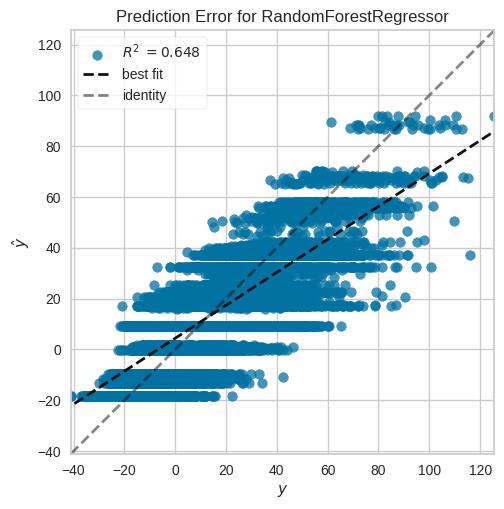

In [46]:
# Para visualizar la forma en que está generalizando nuestro modelo
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

La recta que obtuvimos con nuestro modelo es la segmentada gris, en cambio la que ma se ajusta es la segmentada negra.

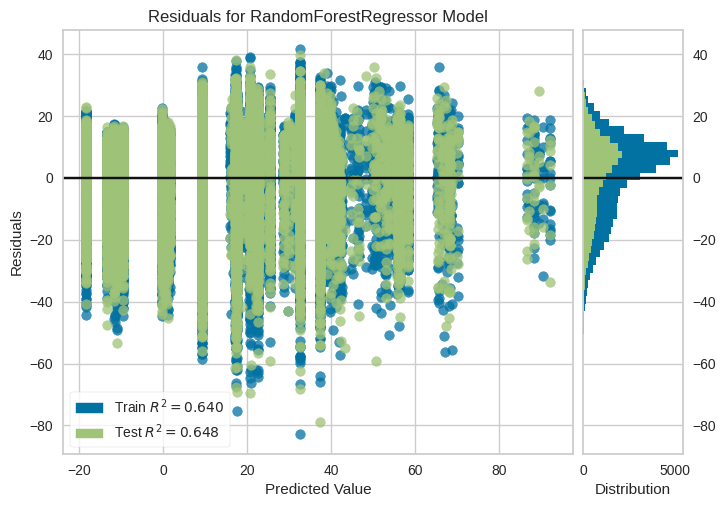

In [47]:
# Ahora vamosa verificar cómo se están comportando los residuos.
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

Aquí tenemos un entrenamiento de análisis de regresión, mediante el cuál se explica mas detalladamente en que consisten los residuos. Lo que se busca es que los datos de prueba tengan un comportamiento lo mas parecido a los datos obtenidos con el entrenamiento.
En este gráfico vemos que el comportamiento de prueba fue muy similar al de entrenamiento. Por ello podemos señalar que el modelo está generalizando relativvamente bien, pero no es suficiente

## Realizando cross validation

##### **Transcripción**


Hemos mencionado que realizamos un modelado utilizando bosques aleatorios, pero únicamente empleamos un mismo conjunto de datos para entrenamiento y otro para prueba.

Por lo tanto, no sabemos si nuestro modelo está generalizando adecuadamente con cualquier combinación de datos de entrenamiento y prueba. La idea de realizar una validación cruzada es precisamente dividir nuestro conjunto de datos en varias partes y tomar diferentes secciones de este conjunto para entrenar y probar.

Para ello, contamos con dos recursos de Scikit-Learn que son KFold. En la documentación, el recurso se llama KFold y se encuentra en Model Selection.

Es un recurso muy sencillo, y en la guía del usuario se muestra cómo funciona. En la documentación, se explica que se toma todo el conjunto de datos y, por ejemplo, para el caso que tenemos aquí, se utiliza el 80% para entrenamiento (representado en verde) y el 20% para prueba (representado en azul).

Se realizarán cinco divisiones, dependiendo de la cantidad de folds que estimemos. Para este caso, son cinco, y el primer doblez será para prueba, mientras que el restante será para entrenamiento.

En el segundo caso, el primer conjunto de datos, el 20%, será para entrenamiento, el siguiente para prueba y el otro 60% para entrenamiento. En el tercer caso, el 40% inicial será para entrenamiento, el otro 20% para prueba y el 40% final para entrenamiento, y así sucesivamente.

De esta manera, realizaremos diversas combinaciones tanto para entrenar como para validar nuestro modelo.

Entonces, es muy sencillo. Utilizamos la clase KFold de Model Selection de Scikit-Learn. Vamos a copiar este código y pegarlo. Importamos directamente de este código: from sklearn.model_selection import KFold.

Vamos a copiar también este trecho de código y eliminar la parte final porque simplemente estamos importando. Lo pegamos en la parte inferior y quitamos el asterisco. Queremos que haga todas las combinaciones posibles, así que lo configuramos como True, con 5 divisiones y un estado de pseudoaleatoriedad para mantener consistencia, dejándolo en 42. Este será nuestro CV.

Ahora necesitamos los resultados de CV. Creamos la variable CVResults y aquí es cuando debemos hacer una validación cruzada. Utilizamos cross_validate. Consultamos la documentación para entender cómo es este método o módulo.

También pertenece a Model Selection y observamos que tiene un estimador, una X, un valor de Y, un scoring (muy importante para validar) y una validación cruzada.

Copiamos hasta aquí, ya que no necesitamos el resto de los parámetros en este momento, y lo pegamos. Nuestro estimador será directamente nuestro modelo, que es RandomForestRegressor, X_train, y Y será Y_train. No necesitamos los groups. El scoring sí lo necesitamos y lo definiremos. La validación cruzada será cv igual a CV.

Definimos nuestro scoring generando un diccionario, similar al que manejamos al inicio, pero aquí cambia porque los recursos de validación cruzada de sklearn requieren que utilicemos una función de utilidad. Una función de utilidad significa que mientras mayor sea el error calculado, mejor será nuestro modelo.

En los puntajes anteriores, utilizábamos funciones de costo, donde mientras menor el error, mejor el modelo. Aquí queremos maximizar el error, por eso utilizamos la versión negativa: neg_root_mean_squared_error.

Si copiamos este tipo de función y la observamos en la documentación, aparece en los métodos de validación cruzada. Al abrir la documentación, encontramos los name scorers en string.

Por ejemplo, las métricas cuya distancia entre el modelo y los datos, como metrics mean squared error, están disponibles como neg_mean_squared_error, que es lo que mencionábamos, porque son funciones de utilidad. Aquí está: neg_mean_squared_error para regresión, no para clasificación y clustering.

Root mean squared error sería neg_root_mean_squared_error, mean squared error sería neg_mean_squared_error, y mean absolute error sería neg_mean_absolute_error, que ya aprovechamos y pegamos. Mean absolute error será precisamente neg_mean_absolute_error y el R cuadrado será r2.

Con nuestro scoring definido, podemos visualizar nuestros resultados. Este proceso demorará un poco porque ejecutará todas las combinaciones posibles y calculará las métricas: root mean squared error, mean absolute error y el coeficiente de determinación.

Al finalizar la ejecución, veremos el tiempo que tomó calcular los resultados con cada combinación. Una vez obtenidos los resultados, no nos enfocaremos en el tiempo que tomó ajustar el modelo ni en los puntajes, sino en los resultados.

La idea es que haya consistencia en esos resultados. Observamos que para el root mean squared error, el valor fue de -13.76, -13.86, -13.96, -13.85, -13.98, mostrando una variación leve pero consistente. En nuestro modelo, fue de 13.74, lo que indica consistencia y un buen resultado.

Para el error promedio absoluto, los valores fueron -11, -11.13, -11.20, -11.14, -11.25, y en nuestro modelo fue -11.02, lo cual es excelente. Por último, el coeficiente de determinación fue 64.5%, 63.74%, 63.5%, 64% y 63.4%, mientras que en nuestro modelo fue 64.77%. Esto indica que realizando esta validación cruzada, realmente hay consistencia en nuestros resultados.

En nuestra próxima clase, avanzaremos un poco más en nuestro modelado, ya que hasta aquí no hemos ajustado ningún hiperparámetro. Lo único que hicimos fue darle una profundidad a nuestro estimador, pero no más. Nuestro estimador tiene muchos más hiperparámetros, los cuales veremos en nuestra próxima clase.

### **Continuación Cross Validation**

La validación cruzada de K-fold esuna técnica utilizada en el aprendizaje automático para evaluar el rendimiento de un modelo Implica dividir el conjunto de datos en k subconjuntos. Un subconjunto se utiliza para la validación (pruebas), mientras que los k-1 subconjuntos restantes se utilizan para entrenar el modelo. Este proceso se repite k veces, y cada subconjunto se convierte en el conjunto de validación. Los resultados de las k iteraciones se promedian para obtener una estimación más robusta del rendimiento del modelo. <br>

En la validación cruzada de K-fold, el conjunto de datos se divide aleatoriamente en n-folds (normalmente 5). A lo largo de 5 iteraciones, el modelo se entrena con 4 de los 5-folds, mientras que el restante actúa como conjunto de prueba para evaluar el rendimiento. Esto se repite hasta que los 5-folds se hayan utilizado como conjunto de prueba en un momento dado. Al final, se obtendrán 5 puntuaciones de error que, al promediarlas, darán como resultado la puntuación de validación cruzada.

![ilustracion](https://towardsdatascience.com/wp-content/uploads/2023/12/1N45hocCMP0u4nXLe0WuSvw-1536x668.png)

In [48]:
from sklearn.model_selection import KFold, cross_validate
#definición del scoring, mediante diccionario
scoring = {
    'RMSE':'neg_root_mean_squared_error', # Los recursos de sklearn de validación cruzada demandan que utilicemos una función de utilidad,
                                          # o sea, mientras mayor sea el error que calcula, nuetro modelo será mejor. En cambio que en los
                                          # puntajes anteriores, estábamos utilizando funciones de costo (el menor error provee un mejor modelo).
                                          # Como necesitamos maximizar el error, usaremos la versión negativa de rmse.
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([2.74324489, 3.72482538, 2.68168879, 2.68168521, 2.66706491]),
 'score_time': array([0.0569067 , 0.05759811, 0.05662823, 0.07246995, 0.05824113]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

El valor del fit_time y el score_time, indican los tiempos que toma el modelo para calcular los resultados, pero estos datos no nos interesan. Si interesan los datos de test_RMSE, _MAE y _R2. La idea es que los resultados tengan coherencia entre ellos. <br>
El RMSE entregó valores con variaciones leves pero muy consitentes, promedio aprox de -13,8% aprox, y comparado con el resultado anterior de 13.74.<br>
El MAE entrega variaciones leves pero con dato bastante consistentes, con promedio aprox de -11,1 y reultado anterior 11,02, lo que concluimos como excelente.<br>
El R2 (Coeficiente de determinación) también entrega valores muy consistentes con promedio de 0,63 y valor anterior de 0,63.<br>
Esto quiere decir que realizando esta validación cruzada, realmente hay consistencia en nuestros resultados.<br>
Hasta aquí, no hemos ajustado ningún hiperparámetro, lo único que hemos hecho es darle una profundidad a nuestro estimador.


## <font color='blue'>**CLASE CUATRO** OPTIMIZACIÓN DE HIPERPARÁMETROS

### **Feature importancesters**

##### **Transcripción, Feature importanceters**

Te damos la bienvenida a la Clase 4. Ya tenemos un modelo de Machine Learning casi listo, pero podemos refinarlo o mejorarlo aún más. En este punto, si tomamos nuestro modelo, vamos a tomar nuestro DataFrame directamente y vamos a ver la cantidad de columnas que estamos utilizando.

¿Será que todas estas columnas son importantes para nuestro modelo? Vamos a ver con cuántos atributos estamos trabajando. Antes de ajustar los hiperparámetros, tenemos 31 atributos, pero ¿serán esos 31 atributos relevantes?

Para saberlo, vamos a tomar nuestro modelo y consultar el atributo feature_importances_, que nos devuelve un NumPy array con el porcentaje de importancia de cada feature (característica). Pero, ¿cuál es cuál? A partir de aquí, podemos crear un DataFrame que llamaremos FeatureImportances.

Será un Pandas DataFrame, y en este Pandas DataFrame colocaremos un diccionario en el cual crearemos una llave que llamaremos Features, que serán las columnas de nuestro DataFrame de entrenamiento, y otra que será Importances, que representará nuestras importancias.

Almacenaremos esto en una variable que llamaremos Importances. Lo almacenamos y lo haremos más legible. Multiplicamos Importances por 100 y redondeamos este valor a dos decimales. Ya tenemos nuestro DataFrame, y vamos a hacer un sort_values por las importancias, con el parámetro ascending igual a False, para que quede en orden descendente.

Tenemos nuestro Pandas DataFrame, colocamos el diccionario con la primera llave, y será la importancia redondeada a dos decimales. Estaba acusando un error inexistente en feature_importances_. Vamos a ver cómo está la importancia de nuestras features.

La importancia absoluta de cada una, es decir, la suma de todas las importancias, dará 100%. Están en orden descendente, y hay varios atributos que no aportan valor, sino que complican nuestro modelado, añadiendo ruido a nuestro modelo. La idea es seleccionar la mejor cantidad de features para nuestro modelo.

Por ejemplo, la aerolínea VZ representa el 53% de nuestro modelo. Si solo utilizamos la aerolínea VZ, nuestro R² ya indicará un 53%. Si tomamos VZ y East Holiday, ya tenemos el 67%, y así sucesivamente. Vamos mejorando, no propiamente el R², pero sí explicando hasta el 67% de nuestra variable de respuesta con las dos variables mencionadas.

Vamos a hacer algo más elaborado para que el análisis sea más lógico y fundamentado con nuestros datos. Crearemos un DataFrame llamado Resultados. Este DataFrame tendrá los índices que serán las métricas que estamos utilizando: RMSE, Mean Absolute Error (MAE) y R².

Ya creamos este DataFrame con los índices. Lo siguiente que queremos es ModelFeatures, que será nuestro regresor, que vamos a instanciar con cada cantidad de features que colocaremos. Vamos a usar diversas features. Haremos un Random Forest, todos con una profundidad máxima de 5 (max_depth) y con el mismo estado de aleatoriedad de 42.

Crearemos la lista de iteración, que es la cantidad de features. La llamaremos CTFeatures y la haremos a través de una List Comprehension.

Si i es diferente de 0, colocaremos 1, de lo contrario, haremos el rango directamente. La lista comenzará con 1 feature, luego 5 features, 10, 15, 20, 25 y 30. Eso es lo que hace esa List Comprehension.

Ahora, vamos a iterar. Utilizaremos un bucle for para recorrer i en CTFeatures. Aquí, asignaremos SelectedFeatures a FeatureImportances, que es el DataFrame que tomamos anteriormente. Vamos a seleccionar todos los valores hasta i.

En el primer caso, sería el primer valor; en el segundo caso, todos hasta el quinto valor, y así sucesivamente. Estas serán las Features seleccionadas.

Luego, extraeremos las variables seleccionadas. X_train_sel será igual a X_train de las variables seleccionadas, es decir, SelectedFeatures. Entrenaremos con estas variables seleccionadas. Para X_test_sel, tomaremos de X_test las variables seleccionadas, SelectedFeatures.

Después de esto, tomaremos nuestro modelo y utilizaremos ModelFeatures.fit para ajustar con X_train_sel y y_train. Luego, realizaremos la predicción y_pred con ModelFeatures.predict, utilizando X_test_sel seleccionada directamente. Las métricas se calcularán con la función calcular_regresion, que recibe y_test y y_pred.

Finalmente, en nuestro DataFrame de resultados, crearemos una columna con el número de Features, y colocaremos en una lista el valor de las métricas, metricas.values.

De esta manera, generaremos nuestro DataFrame, que tomará tiempo debido a la iteración para cada una de las Features en orden de importancia. Realizaremos una iteración únicamente con Airline, luego con Airline, IsHoliday, AircraftType, hasta AircraftType, Embraer, y así sucesivamente.

Voy a ejecutar el código, pausaré el video y volveré tan pronto termine la ejecución. La ejecución del código ha finalizado. Observamos que con una Feature, tenemos un coeficiente de determinación del 33%; con 5 Features, del 57%; con 10 Features, alcanza el 64%; y con 15 Features, llega al 64.76%, estabilizándose. No hay diferencia significativa al usar más de 15 Features.

Voy a modificar el código para cambiar la cantidad de Features, estableciendo un rango de 10 a 15. Ejecutaré de nuevo para observar el comportamiento entre 10 y 15, ya que la última mejora notable está en este rango. Ejecutaré nuevamente, y el proceso tomará algunos segundos, así que pausaré el video otra vez.

La ejecución ha finalizado nuevamente. Observamos que de 10 a 12 Features, hay una mejora gradual hasta llegar a 13 Features, donde se estabiliza. A partir de 13 Features, 14, 15, no hay mejora adicional.

Para el Root Mean Square Error, y también para el Mean Absolute Error, disminuyó de 11.03 a 11.02 minutos, mostrando una mejora. El coeficiente de determinación pasó de 64.74 a 64.76. Por lo tanto, tiene sentido dejarlo en 13 Features.

Para ello, tomaremos las líneas de código de las Features que seleccionaremos para entrenar. Copiaremos estas líneas, las pegaremos en esta celda y eliminaremos la indentación. SelectedFeatures será FeatureImportances hasta 13. X_selected_features será directamente X_selected_features para todo el conjunto de datos.

Ahora, tomamos nuestras Features seleccionadas y veremos cuáles fueron elegidas. Aquí están las 13 que seleccionamos. Comienza con Airline, VZ y va hasta el tipo de aeronave, que sería el Boeing 737, y así sucesivamente. Estas son las Features más importantes.

Procederemos a realizar la división de nuevo: X_train, X_test, y_train, y y_test, utilizando train_test_split, que recibirá nuestra X_selected_features.

Copiaremos aquí, tomaremos y, y estableceremos un estado de aleatoriedad, random_state, igual a 42. De esta manera, ya tenemos nuestro conjunto de datos de entrenamiento y prueba para, en nuestro próximo video, proceder a ajustar nuestros hiperparámetros. ¡Nos vemos pronto!

##### Ya tenemos un modelo de machine learning casi listo, pero podemos afinarlo un poco mas. En este punto, tomamos nuestro modelo y verificamos la cantidad de columnas.

In [50]:
df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [51]:
len(df.columns)

31

Estamos trabajando con 31 atributos y la pregunta que cabe hacer es ¿serán necesarios todos esos atributos?<br>
Para saberlo utilizaremos feature_importances y nos devuelve un numpy array con el % de importancia de cafa feature.

In [54]:
modelo.feature_importances_

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

A partir de aquí crearemos un Pandas DF llamado feature y en este DF colocaremos un diccionario en el cual crearemos una llave que llamaremos feature, y erán las columna de nuestro DF de entrenamiento y otro que va a ser las importancias

In [56]:
importances = modelo.feature_importances_

In [57]:
feature_importances = pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


Hay varios datos que están complicando nuestro modelado, solo hacen ruido, entonces la idea es seleccionar la mejor cantidad de features para nuetro modelo. <br>
Entonces vamos a crear un DF que va a tener únicamente los índices que van a ser las métricas que estamos utilizando RME MAE y R2.<br>
Creamos el regresos model_features, que vamos a instanciar con las cantidades de features que vamos a colocar, luego creamos la lista de iteración, que es la cantidad de features (ct_features) y vamos a hacerlo a través de una lista compreension con rango de 0 a 35 con pasos de 5 (esta lista va a comenzar en 1 si 'i' es diferente de cero dede 1 hasta 35 cada 5 (1, 5, 10, 15, 20, 25 y 30.<br>
Luego iteramos for i in ct_features, que selecionará la features.<br>
 Luego entrenamos con las variables seleccionadas X_test_sel.<br>
 Luego vamos a tomar nuestro modelo modelo_features.fit y hacemos el fit del X_train, del y_train.<br>
 Luego hacemos el y_pred y hacemos la predicción del X-test_sel<br>
 Luego las métricas con la función calcular regresión que recibe y_test y y_pred.<br>
 Finalmente en nuestro DF de resultados, creamos la columna con el nombre de festures o sea y, y colocamos en una lista el valor de las métricas.<br>
 De esta manera generamos el DF

In [58]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


Con 1 feature tenemos un coeficiente de determinación de 33%, con 5 features del 57%, 10 features 64%, con 15 fetaures 64,76% y se estabiliza. Esto indica que no va a hacer mayor diferencia colocar mas de 15 features. Entonces vamos a tomar el código anterior y cambiaremos la cantidad de features y veremos cómo se comporta entre 10 y 15 pues la última mejora notoria está entre estos valores.

In [61]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(10,16)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


Notamos que de 10 a 12 features hay una menora paulatina y en 13 ya se estanca, por lo que tiene sentido que los dejemos en 13 features. Copiamos las líneas de código que vamos a entrenar y colocamos 13 en reemplazo de la "i".

In [62]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


Éstas son las 13 features mas importantes y luego haremos la división

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

Ya tenemos nuestro conjunto de dato de entrenamiento y prueba, para proceder a ajustar nuestros hiperparámetros.

### **Optimizando hiperparámetros con GridSearchCV**

##### **Transcripción Optimizando Hiperparámetros con GridSearchCV**

Transcripción
Hemos elegido las trece features (características) o atributos más importantes de nuestro modelo y ahora procederemos a ajustar los hiperparámetros. Si consultamos la documentación, veremos el estimador de Random Forest y el regresor. Observemos la cantidad de hiperparámetros que podemos ajustar: los estimadores, el criterio, la profundidad máxima, el mínimo de muestras para cada división, las mínimas muestras de hojas, la cantidad máxima de features, la cantidad máxima de nodos de hojas, entre otros.

Es una serie de hiperparámetros bastante numerosa. Sin embargo, no ajustaremos cada uno individualmente, ya que para ello existe un recurso muy importante que nos ofrece Scikit Learn, que es GridSearchCV con validación cruzada (cross-validation).

Este recurso nos permite realizar una búsqueda exhaustiva de los parámetros especificados para un estimador. Vamos a utilizar un diccionario con los parámetros que entrenaremos o usaremos para determinar cuál es el mejor estimador.

Tenemos nuestros param_grids y ahora importaremos la clase GridSearchCV. Copiaremos este código directamente, lo llevaremos a nuestro notebook y lo pegaremos. Eliminaremos la última parte del código que no necesitamos.

Importaremos de la siguiente manera: from sklearn.model_selection import GridSearchCV. Ahora tomaremos nuestra validación cruzada como lo hicimos previamente, utilizando KFold. Especificaremos 5 divisiones, habilitaremos la mezcla con shuffle=True y también estableceremos un estado de aleatoriedad con random_state=42.

Ya tenemos nuestra validación cruzada y ahora pasamos al Model Grid, donde probaremos todos estos parámetros. Vamos a explicar esto más detenidamente.

Utilizaremos nuestro estimador, que será un RandomForestRegressor, con un estado de aleatoriedad (random_state) igual a 42, ya que los otros parámetros los pasaremos a través de param_grid.

El scoring que utilizaremos será únicamente el coeficiente de determinación, para evitar que la ejecución tome demasiado tiempo. Por lo tanto, usaremos solo R². El número de jobs no lo utilizaremos y la validación cruzada será directamente cv. Organizaremos mejor nuestros parámetros.

Por último, realizaremos el ajuste con model_grid.fit, utilizando X_train e y_train. Los parámetros que utilizaremos para nuestro modelo son: profundidad máxima de 5, 10 o 15; mínimo de muestras de hojas de 1, 2 y 3; mínimo de muestras para las divisiones de 2, 4, 6; y número de estimadores de 100, 150 y 200.

Estos parámetros se combinarán de diversas maneras, por ejemplo, 5 de profundidad con 1 de min_samples_leaf, con 2 de min_samples_split, con 100 de estimadores. Luego, 5 de max_depth con 2 aquí, con 2 aquí, con 150 aquí, y así sucesivamente. Habrá más de 60 combinaciones posibles, lo que resultará en una ejecución bastante prolongada.

Ejecutaremos la celda y, una vez finalizada la ejecución, retomaremos el video. La ejecución ha terminado y tomó casi 20 minutos. Ahora tenemos nuestro mejor estimador. Para identificarlo, tomaremos directamente de model_grid los mejores parámetros. Estos son: una profundidad de 10, con un mínimo muestreo de hojas de 3, un mínimo muestreo de divisiones de 2, y un número de estimadores de 200.

Procederemos a ver cómo predijo el modelo. y_pred_grid será igual a model_grid.predict, utilizando X_test. También revisaremos las métricas de inmediato. metricas_model_grid será igual a calcular_regresion, función que recibe y_test y y_pred. Visualizaremos las métricas.

Básicamente, ya realizamos el entrenamiento, ahora simplemente hacemos la previsión con los mejores parámetros. Al comparar, notamos que el coeficiente de determinación superó el 67%, el error absoluto promedio disminuyó a 10.62 minutos, y el Root Mean Square Error a 13.2 minutos. Comparando con los valores anteriores, crearemos una nueva columna de resultados, metricas_model_grid, que será una lista con los valores directamente del modelo Grid.

Al visualizar los resultados, observamos que el modelo Grid mejoró el Root Mean Square Error de 13.74 minutos a 13.2 minutos, y el error absoluto medio de 11.02 minutos a 10.62 minutos, mostrando una mejora continua y notable. El coeficiente de determinación pasó del 64% al 67%, indicando que nuestro modelo realmente mejoró con estos parámetros y características.

En el próximo video, avanzaremos para generar nuestro archivo de serialización, en el cual tendremos el modelo disponible para su consumo. Nos vemos pronto.

##### Nota

Al consultar la biblioteca, podemos notar la cantidad de hiperparámetros que provee RandomForrestregressor, podemos ajustar los estimadores, los criterios, profundida máxima, mínimo de muestras para cada división, mínimo muestras de hojas, la cantidad de features máximas, la cantidad de nodos de hojas máximas, etc., o sea, una serie muy numerosa de hiperparámetros. Pero no vamos a ir individualmente tratando de ajustarlos, si no que para ello, existe un recurso muy importante que también nos ofrece scikitlearn que es GridSearchCV, que nos permite una búsqueda exahustiva de los parámetros especificados para un estimador, entonces vamos a traer un diccionario con los parámetros que vamos a estar entrenado o usando para ver cuál es el mejor estimador:

In [64]:
param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
             }

In [65]:
# Importamos el recurso
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42) # Tomamos la validación cruzada, especificamos 5 divisiones, hacemos que se mezclen (shuffle)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), # Model_grid probará todos los parámetros y el estimador será randomForestRegressor
                          param_grid=param_grid, scoring='r2', # Los otros parámetros los vamos a pasar a través de este param_grid y el scoring con R2, si nó demorará mucho
                          cv=cv) # cv, que es la validación cruzada, será cv

model_grid.fit(X_train,y_train) # hacemos nuestro fit, colocando X_train y y_train
# Los parámetros que vamos a utilizar las combinaciones la profundidad max 5, 10 ó 15, el mínimo de muestras de hojas va ser 1, 2 y 3.
# El mínimo de muestra para las divisiones va a ser 2, 4, 6 y el número de etimadores va a ser 100,150 y 200.
# El modelo va a comenzar a hacer las combinaciones entre toda ellas 5 con 1, 2 y 100, 5 con 1, 4 y 100, 5 con 1, 6 y 100, etc

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

Para saber cuál es nuestro mejor estimador, vamos a tomar de model_grid directamente los mejores parámetros

In [66]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

Entonces los mejores parámetros para nuestro modelo son: Una profundidad de 10, un mínimo de muestreo de hojas de 3,  un mínimo de muestreo de divisiones de 2 y con un mínimo de estimadores de 100.<br>
Ahora veremos cómo predijo

In [68]:
y_pred_grid = model_grid.predict(X_test) # Colocamos la x de prueba
metricas_model_grid = calcular_regresion(y_test,y_pred_grid) # Vamos a ver las métricas recibiendo la y_test e y_pred
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

Podemos notar que el coeficiente de determinación ya fue a mas del 67%, el Error Absoluto Promedio (MAE) bajó a 10,62 minutos, el RMSE a 13,2 minutos.<br>
Si comparamos con los valores anteriores.

In [69]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


El modelo grid, cuando avanzamos con las features, a lo mínimo que llegaba era a 13,74 minutos de RMSE pero con el modelo grid tenemos 13,23; el MAE pasó de 11,02 a 10,62 minutos (hubo mejora notoria con este modelo); y el coeficiente de determinación pasó de 64,76% a 67,54%. eto quiere decir que nuestro modelo realmente, con estos parámetros, con estas features, con todo este tratamiento que realizamos, quedó mucho mejor.<br>
En el próximo capítulo vamos a avanzar en generar nuestor archivo de serialización, en el cual tendremos ya el modelo disponible para poderlo consumir.

#####<font color='blue'> **Para saber más**: hiperparámetros del RandomForestRegressor

El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

1. n_estimators:

Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.<br>

2. criterion:

El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.<br>

3. max_depth:

Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.<br>

4. min_samples_split:

El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.<br>

5. min_samples_leaf:

Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.<br>

6. max_features:

max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.<br>

7. random_state:

Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.<br>

8. n_jobs:

n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.
Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la documentación oficial de scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


### **Serializando el modelo**

##### **Transcripción de Serializando el modelo**

Transcripción
Ya tenemos un modelo de Machine Learning listo para serializar, es decir, para disponibilizarlo y que pueda ser consumido eventualmente por otros equipos.

Para realizar esta tarea, vamos a importar un módulo que nos permite llevar a cabo esta función, llamado pickle. Con pickle, abriremos un archivo binario utilizando open.

Le daremos un nombre, y generalmente, el modelo de Machine Learning que es el mejor y estará en producción lo llamamos Champion. Entonces, con open('Champion.pkl', 'wb'), colocamos el modo de escritura binaria.

A continuación, realizamos un pickle.dump. Hacemos el dump del modelo Grid, pero no solo del modelo Grid, sino del mejor estimador, que es best_estimator_.

No nos interesan los otros estimadores, por lo que queremos que este dump se realice directamente en el archivo. Si hay un error, puede ser porque no estamos utilizando el nombre correcto, como model_grid. Una vez corregido, hacemos el dump y después queremos que se imprima "Modelo Serializado con Éxito".

Sin embargo, puede ocurrir algún error, por lo que utilizamos una lógica de try-except. Si ocurre una excepción, la capturamos con Exception as e y mostramos el error con print("Se presentó un error al almacenar el modelo:", str(e)).

Ejecutamos el código y esperamos que nuestro modelo sea creado y serializado correctamente. Si todo sale bien, veremos el mensaje "Modelo Serializado con Éxito". Al revisar nuestro directorio, encontraremos el archivo Champion.pkl listo para descarga y posterior carga. Lo descargamos y almacenamos directamente en nuestro directorio de datos para tenerlo disponible en futuros proyectos.

Con esto, ya tenemos nuestro modelo de previsión con métricas muy interesantes. ¿Qué significa esta métrica? Que si introducimos al modelo información que contenga la aerolínea, si es feriado, el tipo de aerolínea, y otros atributos, nos proporcionará un resultado con un error de 13 minutos, un error promedio absoluto de 10 minutos de atraso, y tendrá la capacidad de explicar la variable de respuesta en más del 67%. Nos veremos en el próximo vídeo para despedirnos.

##### Nota

Para disponibilizar el modelo vamos a importar un módulo llamado pickle. Lo que haremos con él, abrir un archivo binario de nombre champion

In [70]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito


## FINAL

##### <font color='blue'>**Manos a la obra**: utilizando el modelo guardado

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [71]:
nueva_muestra_final = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a:

In [73]:
schengen_final: 0
arrival_time_final: 10.8941
is_holiday_final: 0
is_weekend_final: 0
airline_BZ_final: 0
airline_MM_final: 0
airline_YE_final: 1
aircraft_type_Airbus_A320_final: 1
aircraft_type_Airbus_A330_final: 0
aircraft_type_Boeing_737_final: 0
aircraft_type_Boeing_777_final: 0
aircraft_type_Boeing_787_final: 0
aircraft_type_Embraer_E175_final: 0

Respuesta:

Para realizar la carga y poder predecir una nueva muestra, vamos a adoptar los pasos a continuación:

1 - Asegúrate de tener el archivo del modelo guardado en un lugar accesible. Por ejemplo, la ruta del archivo puede ser ./modelo_produccion.pkl.

2 - Importa la biblioteca pickle en tu código:

In [77]:
import pickle

3 - Carga el modelo guardado utilizando la función pickle.load():

In [78]:
file_path = './modelos/modelo_produccion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

Ocurrió un error al cargar el modelo: [Errno 2] No such file or directory: './modelos/modelo_produccion.pkl'


El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

4 - Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

In [79]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra_final])[0]

NameError: name 'model' is not defined

De esta manera, podemos utilizar el modelo guardado previamente para hacer predicciones en nuevos datos.

Transcripción
Te felicitamos por haber concluido con éxito este entrenamiento de IA Aumentada sobre la Previsión de Atrasos de Vuelos. A lo largo de este entrenamiento, trabajamos con un conjunto de datos que contiene información sobre vuelos que llegan a un aeropuerto, incluyendo datos de diversas aerolíneas y tipos de aeronaves.

Realizamos una inspección de este conjunto de datos, así como una revisión y un análisis exploratorio. También llevamos a cabo un análisis visual y un análisis de distribución para examinar la estadística descriptiva de estos datos.

Además, realizamos feature engineering (ingeniería de características), generando nuevas columnas y eliminando aquellas que no aportaban información relevante.

De igual manera, codificamos las columnas categóricas para poder generar una línea base o referencia, a partir de la cual desarrollamos un modelo de Machine Learning (aprendizaje automático) que nos permitió estimar el tiempo de atraso de los vuelos.

Esperamos que este entrenamiento haya sido de su agrado. Recuerden dejar su evaluación y comentarios, ya que de esta manera podremos mejorar nuestro contenido. Asimismo, pueden registrar su progreso y todo lo que logren a lo largo de este entrenamiento.

Incluso, si desean utilizar otros conjuntos de datos, pueden hacerlo y publicarlo a través de sus redes en LinkedIn, etiquetando a AluraLatam y a su instructor, @hcamachoD. Les deseamos muchos éxitos y nos vemos en un próximo entrenamiento.

